# Cambiando -99.0 a None

In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import glob, os
import datetime
import matplotlib.pyplot as plt

In [2]:
## Importando los datos para PM10
path = r'C:\Users\luisf\Documents\Python Projects\datamex1019\air-quality-cdmx\data_aircdmx'                     # use your path
all_files = glob.glob(os.path.join(path, "*PM10.xls"))     # advisable to use os.path.join as this makes concatenation OS independent
all_files

['C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2000PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2001PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2002PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2003PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2004PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2005PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2006PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2007PM10.xls',
 'C:\\Users\\luisf\\Documents\\Python Projects\\datamex1019\\air-quality-cdmx\\data_aircdmx\\2008PM10.xls',
 'C:\\Users\\luisf\\Document

In [3]:
df_from_each_file = (pd.read_excel(f) for f in all_files)
df_from_each_file
concatenated_df=pd.concat([i.set_index(['FECHA']+['HORA']) for i in df_from_each_file]).reset_index()

In [4]:
#Filtrando por las alcaldías dentro del alcance
df=concatenated_df[["FECHA","HORA","BJU","HGM","MGH"]]

In [5]:
df.HORA[df.HORA==24] = 00
df.FECHA=df.FECHA.apply(str)
df.FECHA=df.FECHA.apply(lambda x: x.replace(' 00:00:00',''))
df['DATETIME']=df.FECHA + ' ' + df.HORA.apply(str)+':00:00'
#df.DATETIME=df.DATETIME.apply(lambda x: x.replace(' 00:00:00',''))
df.DATETIME=pd.to_datetime(df.DATETIME)
df.DATETIME.head()

0   2000-01-01 01:00:00
1   2000-01-01 02:00:00
2   2000-01-01 03:00:00
3   2000-01-01 04:00:00
4   2000-01-01 05:00:00
Name: DATETIME, dtype: datetime64[ns]

In [6]:
df_benito=df[["DATETIME","FECHA","HORA","BJU"]]
df_cuauh=df[["DATETIME","FECHA","HORA","HGM"]]
df_miguel=df[["DATETIME","FECHA","HORA","MGH"]]

In [7]:
df_benito=df_benito[df_benito.FECHA >= '2015-01-01']
df_cuauh=df_cuauh[df_cuauh.FECHA >= '2012-01-01']
df_miguel=df_miguel[df_miguel.FECHA >= '2015-01-01']

## Miguel

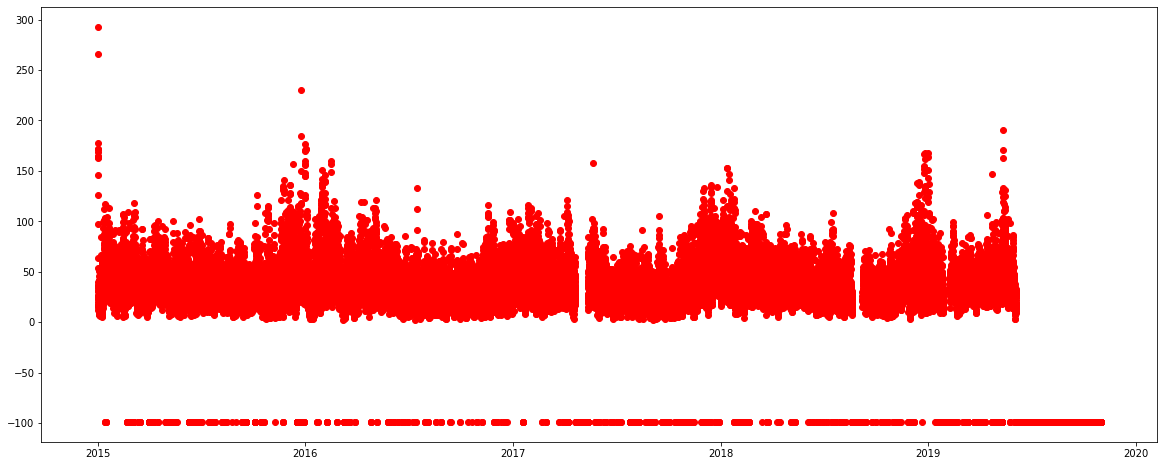

In [8]:
f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(20)
ax.scatter(df_miguel.DATETIME, df_miguel.MGH, color='r');

In [9]:
df_miguel[df_miguel.MGH == -99.0] = None

In [10]:
df_miguel.isnull().sum()

DATETIME    6048
FECHA       6048
HORA        6048
MGH         6048
dtype: int64

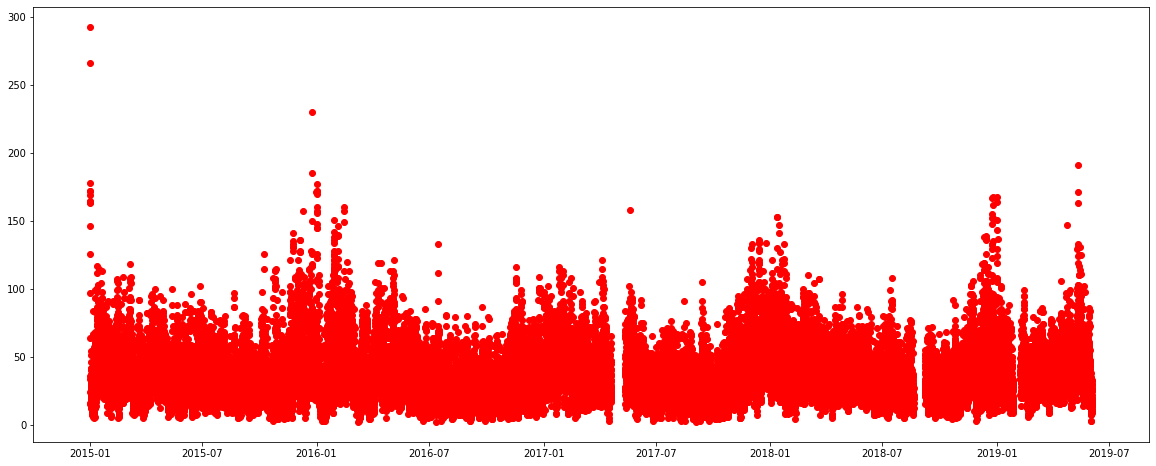

In [11]:
f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(20)
ax.scatter(df_miguel.DATETIME, df_miguel.MGH, color='r');

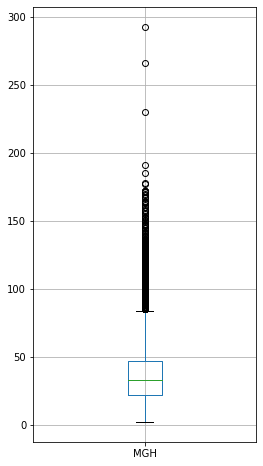

In [12]:
plt.figure(figsize=(4, 8))
df_miguel.boxplot(column = 'MGH');

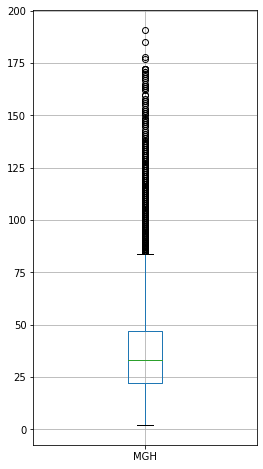

In [13]:
plt.figure(figsize=(4, 8))
df_miguel[df_miguel.MGH < 200].boxplot(column = 'MGH');

In [14]:
df_miguel.to_csv("data_clean/miguel_pm10_clean_v2.csv")